<a href="https://colab.research.google.com/github/Natalina04/Ensino-Superior-no-Brasil/blob/main/Universidades_no_Brasil_Trabalho_Final_Econometria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FGV EPGE - Escola de Pós-Graduação em Economia
==
Econometria
--
Professor: Pedro Engel 
--
Monitor: Maria Gabriela
--
Aluna: Maria Natalina Ferreira Costa


# 1.   OBJETIVO
Analisar econometricamente se existe podemos explicar as váriáveis: Ingressantes, Concluintes e Matricula de alunos do ensino superior com algumas outras váriáveis sociodemográficas dos municípios brasileiros.

**Hipóteses:**

1 - O Numero de Matricula do Ensino superior tem relaçao direta com o PIB.

2 - O Volume de ingressantes no ensino superior pode ser explicado pela variável emprego.

3 - O Volume de Concluintes se explica pela varíavel crescimento de renda.

4 - Na regressão multipla, cada uma das variáveis: Ingressantes, Concluintes e Matricula, podem ser explicados pelas varíveis: IDH, PIB, População de trabalha e crescimento de Renda Média.


# 2. BASE DE DADOS

Para essa análise, foi considerada a base de dados do INEP e sociodemográficos, do Geofusion, as bases do Omaps que é um sistema da ferramenta.
O Geofusion é um programa de georeferenciamento de dados, é usado pelo mercado, por algumas empresas, nas áreas de inteligencia de mercado e marketing, pois organiza as bases públicas e as concentra em um mesmo lugar.
*link referencia* -> https://www.geofusion.com.br/


# 3. Carregar base de Dados
*Bases usadas:*

**1 -> "Faculdades** - Essa base possui todos os dados do INEP, com os nomes das faculdades, endereço, municipios, numero de vagas, ingressantes, concluintes por curso e etc.

**2 -> População** - Essa base possui todos os dados sociodemágraficos do pais a nível municipal: PIB, Taxa de crescimento da População, região demográfica, IDH e etc.

Bibliografia:
# Bibliografia

1. Ministério da Educação e do Desporto – MEC. Plano Nacional de Educação.
Brasília: Instituto Nacional de Estudos e Pesquisas Educacionais, 1998.

2. Macroplan. Macrocenários Mundiais, Nacionais e do Mercosul. Rio de Janeiro,
dezembro, 1997

3. ANHAIA, B. C. O Programa Universidade para Todos: análise da política, do impacto e das vivências dos bolsistas. Monografia (Graduação) – Universidade Federal do Rio Grande do Sul, Porto Alegre, 2010. 



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
from google.colab import drive
import plotly.express as px
import seaborn as sns
!pip install geopandas
!pip install geobr
import geobr
import geopandas as gpd
##Instalando biblioteca sweetviz
import sweetviz as sv
!pip install sweetviz
drive.mount('/content/drive')

root_path = '/content/drive/MyDrive/Python_Mestrado_07_2021/Trabalho Final - 2021'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**3.1 -> Lendo minha base de dados:**

In [ ]:

df_Faculdade=pd.read_excel('/content/drive/MyDrive/Python_Mestrado_07_2021/Trabalho Final - 2021/Faculdades.xls')
df_Faculdade.head()
##type(dataset) - tipo do objeto
##usecols('nome da rede', 'cep', etc) - quais colunas quero usar.

,Sequência,Nome da Unidade,Nome da Rede,Endereço,CEP,Município,Estado,Telefone,Curso,Grau Academico,Nivel,Modalidade,Matricula,Vagas,Ingressantes,Concluintes,Microrregião,Mesorregião,Região Geográfica,Categoria,Camada,Unnamed: 21,Microárea
0,10098000,Faculdade de Tecnologia Senai Mato Grosso,Privada,"Avenida Dom Orlando Chaves, 1536",NaN,Várzea Grande,MT,NaN,Manutenção Industrial,Tecnologo,Graduação Presencial,Presencial,6.0,60.0,NaN,NaN,Cuiabá,Centro-Sul Mato-grossense,Centro-Oeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,Cristo Rei
1,10098000,Faculdade de Tecnologia Senai Mato Grosso,Privada,"Avenida Dom Orlando Chaves, 1536",NaN,Várzea Grande,MT,NaN,Eletrotécnica Industrial,Tecnologo,Graduação Presencial,Presencial,2.0,60.0,34.0,NaN,Cuiabá,Centro-Sul Mato-grossense,Centro-Oeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,Cristo Rei
2,10098000,Faculdade de Tecnologia Senai Mato Grosso,Privada,"Avenida Dom Orlando Chaves, 1536",NaN,Várzea Grande,MT,NaN,Automação Industrial,Tecnologo,Graduação Presencial,Presencial,27.0,60.0,47.0,NaN,Cuiabá,Centro-Sul Mato-grossense,Centro-Oeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,Cristo Rei
3,10098001,Faculdade de Tecnologia Senai Mato Grosso,Privada,"Av. das Siriemas, 1305",NaN,Nova Mutum,MT,NaN,Gestão De Recursos Humanos,Tecnologo,Graduação Presencial,Presencial,9.0,60.0,NaN,NaN,Alto Teles Pires,Norte Mato-grossense,Centro-Oeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,NaN
4,10098002,Faculdade de Tecnologia Senai Mato Grosso,Privada,"Rua Ademir de Jesus Ribeiro, 3147",NaN,Rondonópolis,MT,NaN,Automação Industrial,Tecnologo,Graduação Presencial,Presencial,13.0,60.0,33.0,NaN,Rondonópolis,Sudeste Mato-grossense,Centro-Oeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,Distrito Industrial



**3.2 -> Estatisticas iniciais da base**

In [ ]:
## estatistica do data frame
df_Faculdade.describe()

,Sequência,Matricula,Vagas,Ingressantes,Concluintes
count,3.613200e+04,34768.000000,34045.000000,31859.000000,26974.000000
mean,2.700443e+06,176.586114,177.056190,63.956747,34.557463
std,1.883056e+06,244.883968,236.662938,86.278838,45.468601
min,1.724643e+06,1.000000,1.000000,1.000000,1.000000
25%,1.732242e+06,47.000000,61.000000,22.000000,11.000000
50%,1.735691e+06,111.000000,108.000000,43.000000,22.000000
75%,1.737075e+06,214.000000,200.000000,78.000000,42.000000
max,1.009803e+07,8550.000000,6000.000000,5041.000000,1029.000000


**3.3 -> Lendo a segunda base de dados**

In [ ]:
df_População=pd.read_excel('/content/drive/MyDrive/Python_Mestrado_07_2021/Trabalho Final - 2021/Populacão.xls')
df_População.head()

,Código IBGE,Municípios,Microrregião,Mesorregião,Estado,Região Geográfica,RIC - Imediata,RIC - Intermediária,RIC - Ampliada,Hierarquia dos Municípios,Área Km²,População,Densidade Demográfica,Domicílios,PIB Total (R$ mil),PIB per Capita Total,IDH - Índice de Desenv. Humano,IDH - Índice de Desenv. Humano Classificação,Renda Média,Renda Nominal,PEA Dia,População que Trabalha,IDH - Dimensão Educação,IDH - Dimensão Educação Classificação,IDH - Dimensão Longevidade,IDH - Dimensão Longevidade Classificação,IDH - Dimensão Renda,IDH - Dimensão Renda Classificação,TGCA Renda Média (%),TGCA População (%),Segmentação Municipal
0,110001,Alta Floresta D´Oeste,Cacoal,Leste Rondoniense,RO,Norte,Cacoal,Ji-Paraná,Porto Velho,Centro Local,7067.04,22728,3.216057,8031.985780,499305.982,21552.466094,0.641,Médio,2530.096909,2.032170e+07,12302,6374.0,0.526,Baixo,0.763,Alto,0.657,Médio,-0.564209,-0.704085,Cidades Pacatas do Interior
1,110002,Ariquemes,Ariquemes,Leste Rondoniense,RO,Norte,Ariquemes,Porto Velho,Porto Velho,Centro Sub-Regional B,4426.58,109523,24.742126,39044.796285,2463773.260,23206.364065,0.702,Alto,3347.961956,1.307205e+08,63894,40812.0,0.600,Médio,0.806,Muito Alto,0.716,Alto,-1.361362,1.942734,Polos Industriais
2,110003,Cabixi,Colorado do Oeste,Leste Rondoniense,RO,Norte,Vilhena,Vilhena,Porto Velho,Centro Local,1314.36,5188,3.947168,1924.447150,140502.269,25837.121920,0.650,Médio,2540.115398,4.888318e+06,3016,1573.0,0.559,Baixo,0.757,Alto,0.650,Médio,0.315445,-1.943493,Brasil Carente
3,110004,Cacoal,Cacoal,Leste Rondoniense,RO,Norte,Cacoal,Ji-Paraná,Porto Velho,Centro Sub-Regional B,3792.81,85893,22.646270,31386.153414,2180454.016,25708.959900,0.718,Alto,3416.212273,1.072218e+08,60816,40892.0,0.620,Médio,0.821,Muito Alto,0.727,Alto,-1.579562,0.894593,Interior Próspero
4,110005,Cerejeiras,Colorado do Oeste,Leste Rondoniense,RO,Norte,Vilhena,Vilhena,Porto Velho,Centro de Zona B,2783.30,16204,5.821866,6033.915144,472178.834,28714.353807,0.692,Médio,2958.358927,1.785049e+07,9088,5086.0,0.602,Médio,0.799,Alto,0.688,Médio,-0.232740,-0.495365,Cidades Pacatas do Interior


**3.4 -> Estatisticas iniciais da Base**

In [ ]:
df_População.describe()

,Código IBGE,Área Km²,População,Densidade Demográfica,Domicílios,PIB Total (R$ mil),PIB per Capita Total,IDH - Índice de Desenv. Humano,Renda Média,Renda Nominal,PEA Dia,População que Trabalha,IDH - Dimensão Educação,IDH - Dimensão Longevidade,IDH - Dimensão Renda,TGCA Renda Média (%),TGCA População (%)
count,4524.000000,4524.000000,4.524000e+03,4524.000000,4.524000e+03,4.524000e+03,4524.000000,4522.000000,4524.000000,4.524000e+03,4.524000e+03,4.522000e+03,4522.000000,4522.000000,4522.000000,4522.000000,4522.000000
mean,312170.576481,1417.263962,3.910917e+04,126.622488,1.345186e+04,1.287456e+06,21519.405922,0.650531,2641.726713,6.081074e+07,2.569791e+04,1.763119e+04,0.551757,0.795314,0.631065,0.663205,0.652412
std,93650.502850,4742.818883,2.395030e+05,682.481090,8.546777e+04,1.314182e+07,24489.056626,0.070296,1003.133787,7.218647e+08,1.948044e+05,1.525574e+05,0.093007,0.043812,0.076614,1.266886,1.014301
min,110001.000000,3.570000,7.760000e+02,0.190484,2.736862e+02,1.412593e+04,4788.183697,0.443000,998.369849,7.840313e+05,2.650000e+02,0.000000e+00,0.259000,0.672000,0.400000,-7.442570,-9.636892
25%,250467.500000,219.070000,5.862250e+03,11.401670,1.996323e+03,7.724693e+04,9352.510223,0.592000,1884.488016,4.574043e+06,2.790000e+03,1.339000e+03,0.481000,0.764000,0.565000,-0.143417,0.174017
50%,311745.000000,450.820000,1.224600e+04,25.486636,4.132498e+03,1.747821e+05,15007.442035,0.651000,2448.314420,9.405311e+06,6.096000e+03,3.066000e+03,0.549000,0.801000,0.633000,0.720880,0.654587
75%,352642.500000,1100.300000,2.607700e+04,57.527439,8.739667e+03,4.754049e+05,25109.634765,0.709000,3233.278254,2.247498e+07,1.416325e+04,8.108750e+03,0.623000,0.829000,0.694000,1.532355,1.145880
max,530010.000000,159533.730000,1.232523e+07,14472.745195,4.437552e+06,7.146834e+08,583171.845143,0.862000,15269.368914,3.583864e+10,1.031327e+07,8.214837e+06,0.825000,0.890000,0.891000,5.491485,5.144862


**3.5 -> Unindo as duas bases em um mesmo data frame**

In [ ]:
df_Faculdade_População=df_Faculdade.merge(df_População,left_on='Município',right_on='Municípios')
df_Faculdade_População.head()
##head(quantidade de linha que quero mostrar)

,Sequência,Nome da Unidade,Nome da Rede,Endereço,CEP,Município,Estado_x,Telefone,Curso,Grau Academico,Nivel,Modalidade,Matricula,Vagas,Ingressantes,Concluintes,Microrregião_x,Mesorregião_x,Região Geográfica_x,Categoria,Camada,Unnamed: 21,Microárea,Código IBGE,Municípios,Microrregião_y,Mesorregião_y,Estado_y,Região Geográfica_y,RIC - Imediata,RIC - Intermediária,RIC - Ampliada,Hierarquia dos Municípios,Área Km²,População,Densidade Demográfica,Domicílios,PIB Total (R$ mil),PIB per Capita Total,IDH - Índice de Desenv. Humano,IDH - Índice de Desenv. Humano Classificação,Renda Média,Renda Nominal,PEA Dia,População que Trabalha,IDH - Dimensão Educação,IDH - Dimensão Educação Classificação,IDH - Dimensão Longevidade,IDH - Dimensão Longevidade Classificação,IDH - Dimensão Renda,IDH - Dimensão Renda Classificação,TGCA Renda Média (%),TGCA População (%),Segmentação Municipal
0,10098000,Faculdade de Tecnologia Senai Mato Grosso,Privada,"Avenida Dom Orlando Chaves, 1536",NaN,Várzea Grande,MT,NaN,Manutenção Industrial,Tecnologo,Graduação Presencial,Presencial,6.0,60.0,NaN,NaN,Cuiabá,Centro-Sul Mato-grossense,Centro-Oeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,Cristo Rei,221140,Várzea Grande,Valença do Piauí,Centro-Norte Piauiense,PI,Nordeste,Teresina,Teresina,Fortaleza,Centro Local,237.01,4386,18.505548,1652.205617,32648.543,7425.186036,0.571,Baixo,1594.537826,2.634504e+06,1949,803.0,0.474,Muito Baixo,0.708,Alto,0.554,Baixo,1.840965,0.114720,Brasil Carente
1,10098000,Faculdade de Tecnologia Senai Mato Grosso,Privada,"Avenida Dom Orlando Chaves, 1536",NaN,Várzea Grande,MT,NaN,Manutenção Industrial,Tecnologo,Graduação Presencial,Presencial,6.0,60.0,NaN,NaN,Cuiabá,Centro-Sul Mato-grossense,Centro-Oeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,Cristo Rei,510840,Várzea Grande,Cuiabá,Centro-Sul Mato-grossense,MT,Centro-Oeste,Cuiabá,Cuiabá,Cuiabá,NaN,888.00,287526,323.790541,104084.062645,7984209.543,28311.896227,0.734,Alto,3461.430900,3.602798e+08,166047,105118.0,0.661,Médio,0.842,Muito Alto,0.711,Alto,-0.667994,1.303643,Polos Industriais
2,10098000,Faculdade de Tecnologia Senai Mato Grosso,Privada,"Avenida Dom Orlando Chaves, 1536",NaN,Várzea Grande,MT,NaN,Eletrotécnica Industrial,Tecnologo,Graduação Presencial,Presencial,2.0,60.0,34.0,NaN,Cuiabá,Centro-Sul Mato-grossense,Centro-Oeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,Cristo Rei,221140,Várzea Grande,Valença do Piauí,Centro-Norte Piauiense,PI,Nordeste,Teresina,Teresina,Fortaleza,Centro Local,237.01,4386,18.505548,1652.205617,32648.543,7425.186036,0.571,Baixo,1594.537826,2.634504e+06,1949,803.0,0.474,Muito Baixo,0.708,Alto,0.554,Baixo,1.840965,0.114720,Brasil Carente
3,10098000,Faculdade de Tecnologia Senai Mato Grosso,Privada,"Avenida Dom Orlando Chaves, 1536",NaN,Várzea Grande,MT,NaN,Eletrotécnica Industrial,Tecnologo,Graduação Presencial,Presencial,2.0,60.0,34.0,NaN,Cuiabá,Centro-Sul Mato-grossense,Centro-Oeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,Cristo Rei,510840,Várzea Grande,Cuiabá,Centro-Sul Mato-grossense,MT,Centro-Oeste,Cuiabá,Cuiabá,Cuiabá,NaN,888.00,287526,323.790541,104084.062645,7984209.543,28311.896227,0.734,Alto,3461.430900,3.602798e+08,166047,105118.0,0.661,Médio,0.842,Muito Alto,0.711,Alto,-0.667994,1.303643,Polos Industriais
4,10098000,Faculdade de Tecnologia Senai Mato Grosso,Privada,"Avenida Dom Orlando Chaves, 1536",NaN,Várzea Grande,MT,NaN,Automação Industrial,Tecnologo,Graduação Presencial,Presencial,27.0,60.0,47.0,NaN,Cuiabá,Centro-Sul Mato-grossense,Centro-Oeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,Cristo Rei,221140,Várzea Grande,Valença do Piauí,Centro-Norte Piauiense,PI,Nordeste,Teresina,Teresina,Fortale

**3.6 -> Estatisticas Iniciais do novo data frame**

In [ ]:
df_Faculdade_População.describe()

,Sequência,Matricula,Vagas,Ingressantes,Concluintes,Código IBGE,Área Km²,População,Densidade Demográfica,Domicílios,PIB Total (R$ mil),PIB per Capita Total,IDH - Índice de Desenv. Humano,Renda Média,Renda Nominal,PEA Dia,População que Trabalha,IDH - Dimensão Educação,IDH - Dimensão Longevidade,IDH - Dimensão Renda,TGCA Renda Média (%),TGCA População (%)
count,3.183300e+04,30603.000000,30183.000000,28173.000000,23610.000000,31833.000000,31833.000000,3.183300e+04,31833.000000,3.183300e+04,3.183300e+04,31833.000000,31833.000000,31833.000000,3.183300e+04,3.183300e+04,3.183300e+04,31833.000000,31833.000000,31833.000000,31833.000000,31833.000000
mean,2.730236e+06,180.042120,181.625087,65.670536,35.721855,329674.240599,1987.297889,1.923063e+06,2226.109518,6.860099e+05,1.009958e+08,37655.545679,0.746199,5221.307750,5.548840e+09,1.569460e+06,1.221715e+06,0.671197,0.831740,0.746943,0.286571,1.036615
std,1.913901e+06,250.655414,241.288999,84.471142,46.998888,88194.836578,6113.824571,3.540084e+06,3046.528784,1.273685e+06,2.063432e+08,22536.802914,0.067502,2546.912311,1.110589e+10,2.935337e+06,2.325893e+06,0.083744,0.033103,0.085646,1.659551,0.633298
min,1.724643e+06,1.000000,1.000000,1.000000,1.000000,110002.000000,5.370000,1.594000e+03,0.190484,5.761099e+02,1.728302e+04,5263.414267,0.477000,1037.994713,9.506348e+05,8.540000e+02,3.520000e+02,0.266000,0.689000,0.438000,-4.548138,-3.070796
25%,1.732754e+06,48.000000,63.000000,23.000000,11.000000,270150.000000,331.400000,9.049700e+04,88.093769,3.063162e+04,2.333469e+06,22232.683911,0.716000,3549.680826,1.126329e+08,6.081600e+04,4.062000e+04,0.630000,0.819000,0.702000,-0.829796,0.656435
50%,1.735681e+06,113.000000,110.000000,44.000000,23.000000,330330.000000,732.800000,3.559010e+05,418.079974,1.239543e+05,1.319202e+07,32942.456150,0.763000,4621.816823,5.900005e+08,2.742470e+05,2.003810e+05,0.698000,0.840000,0.758000,-0.072610,0.917195
75%,2.889787e+06,219.000000,202.000000,80.000000,43.000000,355030.000000,1523.280000,1.536097e+06,4163.766966,5.202846e+05,6.132572e+07,52169.128070,0.799000,6471.644620,2.996996e+09,1.442806e+06,1.176547e+06,0.725000,0.855000,0.819000,0.783835,1.344385
max,1.009803e+07,8550.000000,5346.000000,3339.000000,1029.000000,530010.000000,159533.730000,1.232523e+07,14472.745195,4.437552e+06,7.146834e+08,306163.168343,0.862000,15269.368914,3.583864e+10,1.031327e+07,8.214837e+06,0.825000,0.890000,0.891000,5.226415,4.138494


**3.7 -> Listando todas as colunas do novo data Frame**


In [ ]:
df_Faculdade_População.columns
##Lista de todas as colunas do Data frame

Index(['Sequência', 'Nome da Unidade', 'Nome da Rede', 'Endereço', 'CEP',
       'Município', 'Estado_x', 'Telefone', 'Curso', 'Grau Academico', 'Nivel',
       'Modalidade', 'Matricula', 'Vagas', 'Ingressantes', 'Concluintes',
       'Microrregião_x', 'Mesorregião_x', 'Região Geográfica_x', 'Categoria',
       'Camada', 'Unnamed: 21', 'Microárea', 'Código IBGE', 'Municípios',
       'Microrregião_y', 'Mesorregião_y', 'Estado_y', 'Região Geográfica_y',
       'RIC - Imediata', 'RIC - Intermediária', 'RIC - Ampliada',
       'Hierarquia dos Municípios', 'Área Km²', 'População',
       'Densidade Demográfica', 'Domicílios', 'PIB Total (R$ mil)',
       'PIB per Capita Total', 'IDH - Índice de Desenv. Humano',
       'IDH - Índice de Desenv. Humano Classificação', 'Renda Média',
       'Renda Nominal', 'PEA Dia', 'População que Trabalha',
       'IDH - Dimensão Educação', 'IDH - Dimensão Educação Classificação',
       'IDH - Dimensão Longevidade',
       'IDH - Dimensão Longevidade Class

**3.8 -> Verificando a quantidade de dados de cada coluna, o objetivo é entender se temos muitas colunas com células vazias.**

In [ ]:
df_Faculdade_População.count()
##quantidade de linhas em cada coluna

Sequência                                       31833
Nome da Unidade                                 31833
Nome da Rede                                    31833
Endereço                                        31827
CEP                                             28797
Município                                       31833
Estado_x                                        31833
Telefone                                         1842
Curso                                           31833
Grau Academico                                  31833
Nivel                                           31833
Modalidade                                      31833
Matricula                                       30603
Vagas                                           30183
Ingressantes                                    28173
Concluintes                                     23610
Microrregião_x                                  31833
Mesorregião_x                                   31833
Região Geográfica_x         

**3.9 -> Listar as ultimas linhas do data frame**

In [ ]:
df_Faculdade_População.tail(5)
##Ultimas linhas do Data frame

,Sequência,Nome da Unidade,Nome da Rede,Endereço,CEP,Município,Estado_x,Telefone,Curso,Grau Academico,Nivel,Modalidade,Matricula,Vagas,Ingressantes,Concluintes,Microrregião_x,Mesorregião_x,Região Geográfica_x,Categoria,Camada,Unnamed: 21,Microárea,Código IBGE,Municípios,Microrregião_y,Mesorregião_y,Estado_y,Região Geográfica_y,RIC - Imediata,RIC - Intermediária,RIC - Ampliada,Hierarquia dos Municípios,Área Km²,População,Densidade Demográfica,Domicílios,PIB Total (R$ mil),PIB per Capita Total,IDH - Índice de Desenv. Humano,IDH - Índice de Desenv. Humano Classificação,Renda Média,Renda Nominal,PEA Dia,População que Trabalha,IDH - Dimensão Educação,IDH - Dimensão Educação Classificação,IDH - Dimensão Longevidade,IDH - Dimensão Longevidade Classificação,IDH - Dimensão Renda,IDH - Dimensão Renda Classificação,TGCA Renda Média (%),TGCA População (%),Segmentação Municipal
31828,7507560,"Instituto Federal de Educação, Ciência e Tecno...",Pública,Br 364 3501 Campus Tarauacá,69970-000,Tarauacá,AC,68 3222-8291,Gestão Do Agronegócio,Tecnologo,Graduação Presencial,Presencial,37.0,40.0,40.0,NaN,Tarauacá,Vale do Juruá,Norte,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,NaN,120060,Tarauacá,Tarauacá,Vale do Juruá,AC,Norte,Rio Branco,Rio Branco,Porto Velho,Centro de Zona B,2017.10,43151,21.392593,10737.697685,488825.264,11645.351248,0.539,Baixo,1674.620878,1.798157e+07,15481,5446.0,0.392,Muito Baixo,0.720,Alto,0.554,Baixo,-1.891792,1.945084,Cidades Pacatas do Interior
31829,7507586,Faculdade Ages de Jeremoabo,Privada,Rua da Maçonaria 05 Campus Jeremoabo,48540-000,Jeremoabo,BA,NaN,Administração,Bacharelado,Graduação Presencial,Presencial,22.0,6.0,6.0,NaN,Jeremoabo,Nordeste Baiano,Nordeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,NaN,291810,Jeremoabo,Jeremoabo,Nordeste Baiano,BA,Nordeste,Paulo Afonso,Paulo Afonso,Salvador,Centro Local,4656.09,40651,8.730716,14549.160718,325088.321,8080.342041,0.547,Baixo,1853.700244,2.696978e+07,19383,9524.0,0.424,Muito Baixo,0.689,Médio,0.561,Baixo,1.728697,0.761827,Cidades Pacatas do Interior
31830,7507586,Faculdade Ages de Jeremoabo,Privada,Rua da Maçonaria 05 Campus Jeremoabo,48540-000,Jeremoabo,BA,NaN,Pedagogia,Licenciatura,Graduação Presencial,Presencial,61.0,6.0,6.0,NaN,Jeremoabo,Nordeste Baiano,Nordeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,NaN,291810,Jeremoabo,Jeremoabo,Nordeste Baiano,BA,Nordeste,Paulo Afonso,Paulo Afonso,Salvador,Centro Local,4656.09,40651,8.730716,14549.160718,325088.321,8080.342041,0.547,Baixo,1853.700244,2.696978e+07,19383,9524.0,0.424,Muito Baixo,0.689,Médio,0.561,Baixo,1.728697,0.761827,Cidades Pacatas do Interior
31831,7507586,Faculdade Ages de Jeremoabo,Privada,Rua da Maçonaria 05 Campus Jeremoabo,48540-000,Jeremoabo,BA,NaN,História,Licenciatura,Graduação Presencial,Presencial,33.0,3.0,3.0,NaN,Jeremoabo,Nordeste Baiano,Nordeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,NaN,291810,Jeremoabo,Jeremoabo,Nordeste Baiano,BA,Nordeste,Paulo Afonso,Paulo Afonso,Salvador,Centro Local,4656.09,40651,8.730716,14549.160718,325088.321,8080.342041,0.547,Baixo,1853.700244,2.696978e+07,19383,9524.0,0.424,Muito Baixo,0.689,Médio,0.561,Baixo,1.728697,0.761827,Cidades Pacatas do Interior
31832,7507659,"Instituto Federal de Educação, Ciência e Tecno...",Pública,"RN-120, Km 2",59460-000,São Paulo do Potengi,RN,84 4005 0752,Matemática,Licenciatura,Graduação Presencial,Presencial,39.0,40.0,40.0,NaN,Agreste Potiguar,Agreste Potiguar,Nordeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,NaN,241260,São Paulo do Potengi,Agreste Potiguar,Agreste Potiguar,RN,Nordeste,São Paulo do Potengi,Natal,Recife,Centro de Zona B,240.42,17720,73.704351,5725.038940,167066.019,9581.

**3.10 -> Amostra aleatória do Data Frame, importante para verificarmos possiveis distorçoes.**
Como pode ser observado, não há nenhum dado que sugira que tenhamos irregularidade na base.

In [ ]:
df_Faculdade_População.sample(5)
##amostra aleatória do Data frame

,Sequência,Nome da Unidade,Nome da Rede,Endereço,CEP,Município,Estado_x,Telefone,Curso,Grau Academico,Nivel,Modalidade,Matricula,Vagas,Ingressantes,Concluintes,Microrregião_x,Mesorregião_x,Região Geográfica_x,Categoria,Camada,Unnamed: 21,Microárea,Código IBGE,Municípios,Microrregião_y,Mesorregião_y,Estado_y,Região Geográfica_y,RIC - Imediata,RIC - Intermediária,RIC - Ampliada,Hierarquia dos Municípios,Área Km²,População,Densidade Demográfica,Domicílios,PIB Total (R$ mil),PIB per Capita Total,IDH - Índice de Desenv. Humano,IDH - Índice de Desenv. Humano Classificação,Renda Média,Renda Nominal,PEA Dia,População que Trabalha,IDH - Dimensão Educação,IDH - Dimensão Educação Classificação,IDH - Dimensão Longevidade,IDH - Dimensão Longevidade Classificação,IDH - Dimensão Renda,IDH - Dimensão Renda Classificação,TGCA Renda Média (%),TGCA População (%),Segmentação Municipal
20809,1736528,Universidade Estadual do Paraná,Pública,Avenida Comendador Norberto Marcondes 733,87303-100,Campo Mourão,PR,NaN,Pedagogia,Licenciatura,Graduação Presencial,Presencial,264.0,147.0,79.0,44.0,Campo Mourão,Centro Ocidental Paranaense,Sul,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,NaN,410430,Campo Mourão,Campo Mourão,Centro Ocidental Paranaense,PR,Sul,Campo Mourão,Maringá,Curitiba,Centro Sub-Regional A,757.88,95488,125.993561,34609.358326,3.913205e+06,41536.164947,0.757,Alto,4732.312274,1.637823e+08,72132,50161.0,0.689,Médio,0.841,Muito Alto,0.749,Alto,0.649567,0.912791,Polos Industriais
30612,4828311,Universidade Federal do Oeste da Bahia,Pública,Av. Manuel Novais S/N,47600-000,Bom Jesus da Lapa,BA,NaN,Engenharia Mecânica,Bacharelado,Graduação Presencial,Presencial,118.0,67.0,39.0,5.0,Bom Jesus da Lapa,Vale São-Franciscano da Bahia,Nordeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,NaN,290390,Bom Jesus da Lapa,Bom Jesus da Lapa,Vale São-Franciscano da Bahia,BA,Nordeste,Bom Jesus da Lapa,Bom Jesus da Lapa,Salvador,Centro Sub-Regional B,4200.30,69662,16.585006,22533.745523,1.010113e+06,14722.754245,0.633,Médio,2371.061889,5.342891e+07,47037,29972.0,0.533,Baixo,0.775,Alto,0.615,Médio,-0.064683,0.933632,Interior Próspero
26753,1730429,Faculdade Sucesso,Privada,Rua Moraes 310,64460-000,Água Branca,PI,NaN,Serviço Social,Bacharelado,Graduação Presencial,Presencial,77.0,110.0,15.0,45.0,Médio Parnaíba Piauiense,Centro-Norte Piauiense,Nordeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,NaN,270010,Água Branca,Serrana do Sertão Alagoano,Sertão Alagoano,AL,Nordeste,Paulo Afonso,Paulo Afonso,Salvador,Centro Local,454.62,20230,44.498702,6529.820500,1.412309e+05,7004.805773,0.549,Baixo,1762.358015,1.150788e+07,7729,2839.0,0.432,Muito Baixo,0.728,Alto,0.527,Baixo,1.700625,0.431728,Cidades Pacatas do Interior
14512,1735118,Centro Universitário Facex,Privada,Rua Orlando Silva 2896,59080-020,Natal,RN,NaN,Engenharia De Produção,Bacharelado,Graduação Presencial,Presencial,30.0,60.0,NaN,NaN,Natal,Leste Potiguar,Nordeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,Neópolis,240810,Natal,Natal,Leste Potiguar,RN,Nordeste,Natal,Natal,Recife,Capital Regional A,167.16,890480,5327.111749,295040.926549,2.380367e+07,27122.365387,0.763,Alto,5112.756997,1.508473e+09,939431,733586.0,0.694,Médio,0.835,Muito Alto,0.768,Alto,-0.528118,1.030130,Metrópoles
26477,1735102,Faculdade de Educação Tecnológica do Estado do...,Pública,Rua Sebastião de Lacerda S/N,26600-000,Paracambi,RJ,NaN,Gestão Ambiental,Tecnologo,Graduação Presencial,Presencial,244.0,150.0,136.0,5.0,Vassouras,Metropolitana do Rio de Janeiro,Sudeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,NaN,330360,Paracambi,Vassouras,Metropolitana do Rio de Janeiro,RJ,Sudeste,Rio de Janeiro,Rio de Janeiro,Rio

**3.11 -> Os códigos a seguir fazem uma exploração na base de dados, verificando informações e a necessidade de revisão da base, abaixo dos códigos as informações sobre sua funcionalidade e objetivo.**


In [ ]:
df_Faculdade_População.shape
##quantidade de linhas e colunas

(31833, 54)

In [ ]:
df_Faculdade_População.info()
##Tipo de dado de cada coluna e a quantidade

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31833 entries, 0 to 31832
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Sequência                                     31833 non-null  int64  
 1   Nome da Unidade                               31833 non-null  object 
 2   Nome da Rede                                  31833 non-null  object 
 3   Endereço                                      31827 non-null  object 
 4   CEP                                           28797 non-null  object 
 5   Município                                     31833 non-null  object 
 6   Estado_x                                      31833 non-null  object 
 7   Telefone                                      1842 non-null   object 
 8   Curso                                         31833 non-null  object 
 9   Grau Academico                                31833 non-null 

In [ ]:
df_Faculdade_População.value_counts(df_Faculdade_População['Município'])
#contar valores unicos de cada coluna

Município
São Paulo                    2740
Rio de Janeiro               1526
Brasília                      846
Belo Horizonte                815
Belém                         780
                             ... 
Joaíma                          1
Presidente Vargas               1
Brasiléia                       1
Porecatu                        1
Santo Antônio do Leverger       1
Length: 891, dtype: int64

In [ ]:
df_Faculdade_População.value_counts(df_Faculdade_População['Estado_x'])
#contar valores unicos de cada coluna (quantidade de dados por estado)

Estado_x
SP    8869
MG    3907
RJ    2673
BA    2033
PR    1707
GO    1369
PE    1254
CE    1225
PA    1042
DF     846
MS     812
MT     791
ES     746
PB     621
RN     589
PI     579
MA     470
AL     393
RO     385
SE     376
RS     282
TO     277
AC     258
AM     178
RR     122
SC      18
AP      11
dtype: int64

In [ ]:
##Filtrar por condições, no exemplo escolhi a coluna estado e o estado que quero analisar.
df_Faculdade_População.loc[df_Faculdade_População['Estado_x'] == 'RJ']


,Sequência,Nome da Unidade,Nome da Rede,Endereço,CEP,Município,Estado_x,Telefone,Curso,Grau Academico,Nivel,Modalidade,Matricula,Vagas,Ingressantes,Concluintes,Microrregião_x,Mesorregião_x,Região Geográfica_x,Categoria,Camada,Unnamed: 21,Microárea,Código IBGE,Municípios,Microrregião_y,Mesorregião_y,Estado_y,Região Geográfica_y,RIC - Imediata,RIC - Intermediária,RIC - Ampliada,Hierarquia dos Municípios,Área Km²,População,Densidade Demográfica,Domicílios,PIB Total (R$ mil),PIB per Capita Total,IDH - Índice de Desenv. Humano,IDH - Índice de Desenv. Humano Classificação,Renda Média,Renda Nominal,PEA Dia,População que Trabalha,IDH - Dimensão Educação,IDH - Dimensão Educação Classificação,IDH - Dimensão Longevidade,IDH - Dimensão Longevidade Classificação,IDH - Dimensão Renda,IDH - Dimensão Renda Classificação,TGCA Renda Média (%),TGCA População (%),Segmentação Municipal
5113,10098026,Universidade Estácio de Sá,Privada,"Rua Vinte e Quatro, 236",NaN,Volta Redonda,RJ,NaN,Ciências Contábeis,Bacharelado,Graduação Presencial,Presencial,20.0,322.0,16.0,NaN,Vale do Paraíba Fluminense,Sul Fluminense,Sudeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,Centro,330630,Volta Redonda,Vale do Paraíba Fluminense,Sul Fluminense,RJ,Sudeste,Volta Redonda - Barra Mansa,Volta Redonda - Barra Mansa,Rio de Janeiro,Capital Regional C,182.48,273988,1501.468654,109617.996591,1.376489e+07,50606.583339,0.771,Alto,5725.228231,6.275880e+08,219933,139913.0,0.720,Alto,0.833,Muito Alto,0.763,Alto,1.851322,0.610743,Centros de Influência
5114,10098026,Universidade Estácio de Sá,Privada,"Rua Vinte e Quatro, 236",NaN,Volta Redonda,RJ,NaN,Logística,Tecnologo,Graduação Presencial,Presencial,39.0,242.0,24.0,9.0,Vale do Paraíba Fluminense,Sul Fluminense,Sudeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,Centro,330630,Volta Redonda,Vale do Paraíba Fluminense,Sul Fluminense,RJ,Sudeste,Volta Redonda - Barra Mansa,Volta Redonda - Barra Mansa,Rio de Janeiro,Capital Regional C,182.48,273988,1501.468654,109617.996591,1.376489e+07,50606.583339,0.771,Alto,5725.228231,6.275880e+08,219933,139913.0,0.720,Alto,0.833,Muito Alto,0.763,Alto,1.851322,0.610743,Centros de Influência
5115,10098026,Universidade Estácio de Sá,Privada,"Rua Vinte e Quatro, 236",NaN,Volta Redonda,RJ,NaN,Administração,Bacharelado,Graduação Presencial,Presencial,29.0,323.0,30.0,NaN,Vale do Paraíba Fluminense,Sul Fluminense,Sudeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,Centro,330630,Volta Redonda,Vale do Paraíba Fluminense,Sul Fluminense,RJ,Sudeste,Volta Redonda - Barra Mansa,Volta Redonda - Barra Mansa,Rio de Janeiro,Capital Regional C,182.48,273988,1501.468654,109617.996591,1.376489e+07,50606.583339,0.771,Alto,5725.228231,6.275880e+08,219933,139913.0,0.720,Alto,0.833,Muito Alto,0.763,Alto,1.851322,0.610743,Centros de Influência
5116,10098026,Universidade Estácio de Sá,Privada,"Rua Vinte e Quatro, 236",NaN,Volta Redonda,RJ,NaN,Gestão De Recursos Humanos,Tecnologo,Graduação Presencial,Presencial,25.0,242.0,19.0,5.0,Vale do Paraíba Fluminense,Sul Fluminense,Sudeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,Centro,330630,Volta Redonda,Vale do Paraíba Fluminense,Sul Fluminense,RJ,Sudeste,Volta Redonda - Barra Mansa,Volta Redonda - Barra Mansa,Rio de Janeiro,Capital Regional C,182.48,273988,1501.468654,109617.996591,1.376489e+07,50606.583339,0.771,Alto,5725.228231,6.275880e+08,219933,139913.0,0.720,Alto,0.833,Muito Alto,0.763,Alto,1.851322,0.610743,Centros de Influência
5117,1724982,Universidade Federal Fluminense,Pública,Av. dos Trabalhadores 420,27255-125,Volta Redonda,RJ,NaN,Engenharia Metalúrgica,Bacharelado,Graduação Presencial,Presencial,238.0,68.0,55.0,28.0,Vale do Paraíba Fluminense,Sul Fluminense,Sudeste,/Polos/Ensino/Educação Superior 

In [ ]:
##Filtrar por condições (+ de uma)
df_Faculdade_População.loc[(df_Faculdade_População['Estado_x'] == 'PE') & (df_Faculdade_População['Curso'] == 'Engenharia De Produção')]

,Sequência,Nome da Unidade,Nome da Rede,Endereço,CEP,Município,Estado_x,Telefone,Curso,Grau Academico,Nivel,Modalidade,Matricula,Vagas,Ingressantes,Concluintes,Microrregião_x,Mesorregião_x,Região Geográfica_x,Categoria,Camada,Unnamed: 21,Microárea,Código IBGE,Municípios,Microrregião_y,Mesorregião_y,Estado_y,Região Geográfica_y,RIC - Imediata,RIC - Intermediária,RIC - Ampliada,Hierarquia dos Municípios,Área Km²,População,Densidade Demográfica,Domicílios,PIB Total (R$ mil),PIB per Capita Total,IDH - Índice de Desenv. Humano,IDH - Índice de Desenv. Humano Classificação,Renda Média,Renda Nominal,PEA Dia,População que Trabalha,IDH - Dimensão Educação,IDH - Dimensão Educação Classificação,IDH - Dimensão Longevidade,IDH - Dimensão Longevidade Classificação,IDH - Dimensão Renda,IDH - Dimensão Renda Classificação,TGCA Renda Média (%),TGCA População (%),Segmentação Municipal
9708,1724831,Faculdade do Belo Jardim,Privada,Sítio Inhumas S/N,55150-000,Belo Jardim,PE,NaN,Engenharia De Produção,Bacharelado,Graduação Presencial,Presencial,24.0,200.0,2.0,NaN,Vale do Ipojuca,Agreste Pernambucano,Nordeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,NaN,260170,Belo Jardim,Vale do Ipojuca,Agreste Pernambucano,PE,Nordeste,Belo Jardim,Caruaru,Recife,Centro de Zona A,647.69,76687,118.400778,27646.407622,1.883329e+06,24720.464396,0.629,Médio,2796.673712,7.731798e+07,57854,40070.0,0.514,Baixo,0.783,Alto,0.617,Médio,3.113587,0.572473,Interior Próspero
9719,7506878,Faculdade Pitágoras Belo Jardim,Privada,Rua Doutor Henrique Nascimento 41,55155-580,Belo Jardim,PE,NaN,Engenharia De Produção,Bacharelado,Graduação Presencial,Presencial,31.0,21.0,21.0,NaN,Vale do Ipojuca,Agreste Pernambucano,Nordeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,NaN,260170,Belo Jardim,Vale do Ipojuca,Agreste Pernambucano,PE,Nordeste,Belo Jardim,Caruaru,Recife,Centro de Zona A,647.69,76687,118.400778,27646.407622,1.883329e+06,24720.464396,0.629,Médio,2796.673712,7.731798e+07,57854,40070.0,0.514,Baixo,0.783,Alto,0.617,Médio,3.113587,0.572473,Interior Próspero
10369,7507461,Fundação Universidade Federal do Vale do São F...,Pública,Rua Antonio Filgueira Sampaio 134,56000-000,Salgueiro,PE,87 2101-6830,Engenharia De Produção,Bacharelado,Graduação Presencial,Presencial,30.0,40.0,39.0,NaN,Salgueiro,Sertão Pernambucano,Nordeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,NaN,261220,Salgueiro,Salgueiro,Sertão Pernambucano,PE,Nordeste,Salgueiro,Petrolina - Juazeiro,Recife,Centro de Zona A,1686.81,61249,36.310551,19125.477561,8.589179e+05,14172.627615,0.669,Médio,3364.955714,6.435639e+07,40167,26903.0,0.580,Baixo,0.799,Alto,0.645,Médio,1.814511,0.787346,Interior Próspero
13967,1725320,Centro Universitário Facol,Privada,Rua do Estudante 85,55612-650,Vitória de Santo Antão,PE,NaN,Engenharia De Produção,Bacharelado,Graduação Presencial,Presencial,24.0,200.0,24.0,NaN,Vitória de Santo Antão,Mata Pernambucana,Nordeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,NaN,261640,Vitória de Santo Antão,Vitória de Santo Antão,Mata Pernambucana,PE,Nordeste,Vitória de Santo Antão,Recife,Recife,Centro Sub-Regional B,371.80,139583,375.424960,49845.964729,3.718817e+06,26964.558054,0.640,Médio,2792.163317,1.391781e+08,120075,86883.0,0.543,Baixo,0.768,Alto,0.629,Médio,2.397721,0.715799,Polos Industriais
17578,1734183,Universidade Federal de Pernambuco,Pública,"Rodovia Br-104 - Até Km 65,001 - Lado Ímpar S/N",55014-170,Caruaru,PE,NaN,Engenharia De Produção,Bacharelado,Graduação Presencial,Presencial,360.0,80.0,79.0,31.0,Vale do Ipojuca,Agreste Pernambucano,Nordeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,Caiucá,260410,Caruaru,Vale do Ipojuca,Agreste Pernambucano,PE,Nordeste,C

In [ ]:
##filtrar comandos específicos pra contar quantidade de registros
df_Faculdade_População[df_Faculdade_População['Estado_x']=='RJ'].count()

Sequência                                       2673
Nome da Unidade                                 2673
Nome da Rede                                    2673
Endereço                                        2673
CEP                                             2442
Município                                       2673
Estado_x                                        2673
Telefone                                          97
Curso                                           2673
Grau Academico                                  2673
Nivel                                           2673
Modalidade                                      2673
Matricula                                       2401
Vagas                                           2433
Ingressantes                                    2218
Concluintes                                     1940
Microrregião_x                                  2673
Mesorregião_x                                   2673
Região Geográfica_x                           

In [ ]:
##Ordenação direta no Data Frame (Ascending <>)
df_Faculdade_População.sort_values(by='Renda Média', ascending=False)

,Sequência,Nome da Unidade,Nome da Rede,Endereço,CEP,Município,Estado_x,Telefone,Curso,Grau Academico,Nivel,Modalidade,Matricula,Vagas,Ingressantes,Concluintes,Microrregião_x,Mesorregião_x,Região Geográfica_x,Categoria,Camada,Unnamed: 21,Microárea,Código IBGE,Municípios,Microrregião_y,Mesorregião_y,Estado_y,Região Geográfica_y,RIC - Imediata,RIC - Intermediária,RIC - Ampliada,Hierarquia dos Municípios,Área Km²,População,Densidade Demográfica,Domicílios,PIB Total (R$ mil),PIB per Capita Total,IDH - Índice de Desenv. Humano,IDH - Índice de Desenv. Humano Classificação,Renda Média,Renda Nominal,PEA Dia,População que Trabalha,IDH - Dimensão Educação,IDH - Dimensão Educação Classificação,IDH - Dimensão Longevidade,IDH - Dimensão Longevidade Classificação,IDH - Dimensão Renda,IDH - Dimensão Renda Classificação,TGCA Renda Média (%),TGCA População (%),Segmentação Municipal
17891,7507518,Centro Universitário Anhanguera de Niterói,Privada,Avenida Ernani do Amaral Peixoto 35 Amaral Pei...,24020-070,Niterói,RJ,21 2199 1441,Comunicação Social - Publicidade E Propaganda,Bacharelado,Graduação Presencial,Presencial,150.0,151.0,66.0,35.0,Rio de Janeiro,Metropolitana do Rio de Janeiro,Sudeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,Centro,330330,Niterói,Rio de Janeiro,Metropolitana do Rio de Janeiro,RJ,Sudeste,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,NaN,133.92,515317,3847.946535,188259.362692,4.035668e+07,78854.597306,0.837,Muito Alto,15269.368914,2.874602e+09,403725,292232.0,0.773,Alto,0.854,Muito Alto,0.887,Muito Alto,4.733119,0.555183,Metrópoles
17815,1730536,Universidade Salgado de Oliveira,Privada,Rua Marechal Deodoro 211/263,24020-420,Niterói,RJ,NaN,Farmácia,Bacharelado,Graduação Presencial,Presencial,154.0,410.0,46.0,20.0,Rio de Janeiro,Metropolitana do Rio de Janeiro,Sudeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,Centro,330330,Niterói,Rio de Janeiro,Metropolitana do Rio de Janeiro,RJ,Sudeste,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,NaN,133.92,515317,3847.946535,188259.362692,4.035668e+07,78854.597306,0.837,Muito Alto,15269.368914,2.874602e+09,403725,292232.0,0.773,Alto,0.854,Muito Alto,0.887,Muito Alto,4.733119,0.555183,Metrópoles
17787,1729299,Universidade Estácio de Sá,Privada,Rua da Conceição 131,24020-080,Niterói,RJ,NaN,Letras - Português E Inglês,Licenciatura,Graduação Presencial,Presencial,NaN,120.0,NaN,NaN,Rio de Janeiro,Metropolitana do Rio de Janeiro,Sudeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,Centro,330330,Niterói,Rio de Janeiro,Metropolitana do Rio de Janeiro,RJ,Sudeste,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,NaN,133.92,515317,3847.946535,188259.362692,4.035668e+07,78854.597306,0.837,Muito Alto,15269.368914,2.874602e+09,403725,292232.0,0.773,Alto,0.854,Muito Alto,0.887,Muito Alto,4.733119,0.555183,Metrópoles
17786,1729147,Universidade Federal Fluminense,Pública,Alameda Prof. Barros Terra S/nº,49200-000,Niterói,RJ,NaN,Ciências Biológicas,Licenciatura,Graduação Presencial,Presencial,218.0,74.0,75.0,42.0,Rio de Janeiro,Metropolitana do Rio de Janeiro,Sudeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,/Polos/Ensino/Educação Superior por Curso,Icaraí,330330,Niterói,Rio de Janeiro,Metropolitana do Rio de Janeiro,RJ,Sudeste,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,NaN,133.92,515317,3847.946535,188259.362692,4.035668e+07,78854.597306,0.837,Muito Alto,15269.368914,2.874602e+09,403725,292232.0,0.773,Alto,0.854,Muito Alto,0.887,Muito Alto,4.733119,0.555183,Metrópoles
17785,1729147,Universidade Federal Fluminense,Pública,Alameda Prof. Barros Terra S/nº,49200-000,Niterói,RJ,NaN,Ciências Biológicas,Bacharelado,Graduação Presencial,Presencial,350.0,100.0,98.0,56.0,Rio de Janeiro,Metropolitana do Rio de Janeiro,Sudeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior po

**3.12 -> Criando uma nova coluna no Data Frame.**

O Objetivo do modelo abaixo é apenas explorar o código, porém esse indicador de Renda Local, nos dá uma dimensão, de forma básica, da circulação da renda nas regiões, uma vez que divide o PIB do lugar pela população + pessoas que trabalham no local.

In [ ]:
##Operações entre colunas -> criando uma nova coluna no data frame

df_Faculdade_População['Renda Local'] = (df_Faculdade_População['PIB Total (R$ mil)']/df_Faculdade_População['PEA Dia'])
df_Faculdade_População['Renda Local'].head()

0    16.751433
1    48.084034
2    16.751433
3    48.084034
4    16.751433
Name: Renda Local, dtype: float64

**3.13 -> O Método drop é usado pra excluir dados do data frame, o comando axis=1, define que queremos excluir uma coluna e não uma linha e o comando inplace= true, define que iremos modificar o objeto em memoria.**

In [ ]:
#Excluindo dados do data frame, mantendo apenas os dados que serão usados na análises.

##del df_Faculdade_População['CEP']
#df_Faculdade_População.drop('Endereço', axis=1, inplace=True)
#df_Faculdade_População.drop('Telefone', axis=1, inplace=True)
#df_Faculdade_População.drop('Estado_y', axis=1, inplace=True)
#df_Faculdade_População.drop('Região Geográfica_y', axis=1, inplace=True)
#df_Faculdade_População.drop('Sequência', axis=1, inplace=True)
#df_Faculdade_População.drop('Microrregião_y', axis=1, inplace=True)
df_Faculdade_População.drop('Unnamed: 21', axis=1, inplace=True)
df_Faculdade_População.drop('Mesorregião_y', axis=1, inplace=True)
df_Faculdade_População.drop('Renda Local', axis=1, inplace=True)
df_Faculdade_População.head(2)


,Nome da Unidade,Nome da Rede,Município,Estado_x,Curso,Grau Academico,Nivel,Modalidade,Matricula,Vagas,Ingressantes,Concluintes,Microrregião_x,Mesorregião_x,Região Geográfica_x,Categoria,Camada,Microárea,Código IBGE,Municípios,RIC - Imediata,RIC - Intermediária,RIC - Ampliada,Hierarquia dos Municípios,Área Km²,População,Densidade Demográfica,Domicílios,PIB Total (R$ mil),PIB per Capita Total,IDH - Índice de Desenv. Humano,IDH - Índice de Desenv. Humano Classificação,Renda Média,Renda Nominal,PEA Dia,População que Trabalha,IDH - Dimensão Educação,IDH - Dimensão Educação Classificação,IDH - Dimensão Longevidade,IDH - Dimensão Longevidade Classificação,IDH - Dimensão Renda,IDH - Dimensão Renda Classificação,TGCA Renda Média (%),TGCA População (%),Segmentação Municipal
0,Faculdade de Tecnologia Senai Mato Grosso,Privada,Várzea Grande,MT,Manutenção Industrial,Tecnologo,Graduação Presencial,Presencial,6.0,60.0,NaN,NaN,Cuiabá,Centro-Sul Mato-grossense,Centro-Oeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,Cristo Rei,221140,Várzea Grande,Teresina,Teresina,Fortaleza,Centro Local,237.01,4386,18.505548,1652.205617,32648.543,7425.186036,0.571,Baixo,1594.537826,2.634504e+06,1949,803.0,0.474,Muito Baixo,0.708,Alto,0.554,Baixo,1.840965,0.114720,Brasil Carente
1,Faculdade de Tecnologia Senai Mato Grosso,Privada,Várzea Grande,MT,Manutenção Industrial,Tecnologo,Graduação Presencial,Presencial,6.0,60.0,NaN,NaN,Cuiabá,Centro-Sul Mato-grossense,Centro-Oeste,/Polos/Ensino/Educação Superior por Curso,Educação Superior por Curso,Cristo Rei,510840,Várzea Grande,Cuiabá,Cuiabá,Cuiabá,NaN,888.00,287526,323.790541,104084.062645,7984209.543,28311.896227,0.734,Alto,3461.430900,3.602798e+08,166047,105118.0,0.661,Médio,0.842,Muito Alto,0.711,Alto,-0.667994,1.303643,Polos Industriais


# 4 BIBLIOTECA SWEETVIZ

vamos analisar os dados do Data Frame, usando a biblioteca Sweetviz. é uma biblioteca de código aberto que apresenta uma visualização rápida dos principais dados com comparação entre eles.

In [ ]:
##Biblioteca sweetviz -> 
Myreport=sv.analyze(df_Faculdade_População)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
#apresentação grafica análise dos dados do data frame
Myreport.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


*4.0 -> O Html será gerado abaixo, com as principais estatistica do data frame e pode ser analisado agora, o arquivo é gerado na pasta arquivos. O Arquivo gerado está na pasta "Trabalho Final".*

link ->  file:///C:/Users/maria.costa/OneDrive%20-%20Corporativo%20(1)/%C3%81rea%20de%20Trabalho/SWEETVIZ_REPORT.html



**4.1-> Apartir da análise dos graficos gerados pela bibliotera sweetviz, é possivel fazer alguma correlações:**

1. Quando observamos a segmentação "Brasil Carente e "Cidades pacatas do interior" percebemos um crescimento maior dos cursos de licenciatura, porém os dados são inclusivos sobre ser o perfil local, ou da segmentação.**

2. Existe uma relação direta entre Numero de universidades no local, e o indicador de IDH, as segmentações que apresentam maior capacidade financeira, são aquelas com maior numero de universidades.**
O Objetivo da análise é entender a relação entre o ensino superior com a renda, perfil dos municípios e dos estados.

3. Observa-se que, as metrópoles concentram o maior volume de universidades publicas e privadas, e também de ingressantes e concluintes do ensino superior, essas regiões também concentram maior população. Em contra partida, temos o Brasil Rural, com 1% das ofertas e estudantes e universidades, é uma ausencia de demanda, ou de oferta? Esse perfil estimula o exodo dos candidatos ao ensino superior para as metrópoles, ao longo dos próximos anos, poderemos observar alguma alteração/mudança nesse cenário, com a expansão do ensino superior na modalidade EAD.

4. Os cursos: Administração, Direito, Pedagogia, Educação Física, Ciências Contábeis, Enfermagem e Engenharia Civil, concentram cerca de 30% dos ingressantes nas universidades, em detrimento aos demais cursos.

5. São Paulo, Rio de Janeiro e Belo Horizonte são as cidades que mais concentram o publico de universitários no pais, a cidade de São Paulo sozinha, concentra 10% dos estudantes de todo o Brasil, não por acaso, a região do sudeste concentra, mais de 50% do volume de universidades/estudantes do ensino superior.

6. Pode-se concluir que,  dado as ofertas das universidades publicas e privadas e o alcance das mesmas, que uma politica efetiva do governo federal no fomento a educação superior, deve está relacionada a ampliação e expansão das universidades privadas no mercado nacional, e desse modo, uma maior aproximação e orientação sobre a qualidade do ensino e infraestrutura dessas organizações.


# 5. GRAFICOS DE SEGMENTAÇÃO MUNICIPAL

**5.1 -> Abaixo uma análise grafica considerando o IDH dos municípios de acordo com os estados e em seguida considerando a segmentação municipal, é possivel observar a distribuição e concentração do indíce, e como esse indicador performa localmente.**

In [ ]:
##Grafico de explicativos dos dados
fig = px.bar(df_Faculdade_População, x="Estado_x", y='IDH - Índice de Desenv. Humano', color="IDH - Índice de Desenv. Humano Classificação")
fig.show()

In [ ]:
fig = px.bar(df_Faculdade_População,x="Estado_x", y='IDH - Dimensão Renda', color="Segmentação Municipal")
fig.show()

# 6. INSERINDO DADOS ECONOMÉTRICOS

**6.1 -> Inserindo análises de regressão e outras análises econométricas, o objetico é entender se as variáveis são dependentes umas das outras, foram analisadas algumas variáveis, e abaixo temos as duas análises mais relevantes.**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from   sklearn.linear_model import LinearRegression
from   sklearn.metrics import r2_score
import statsmodels.api as sm
import os

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



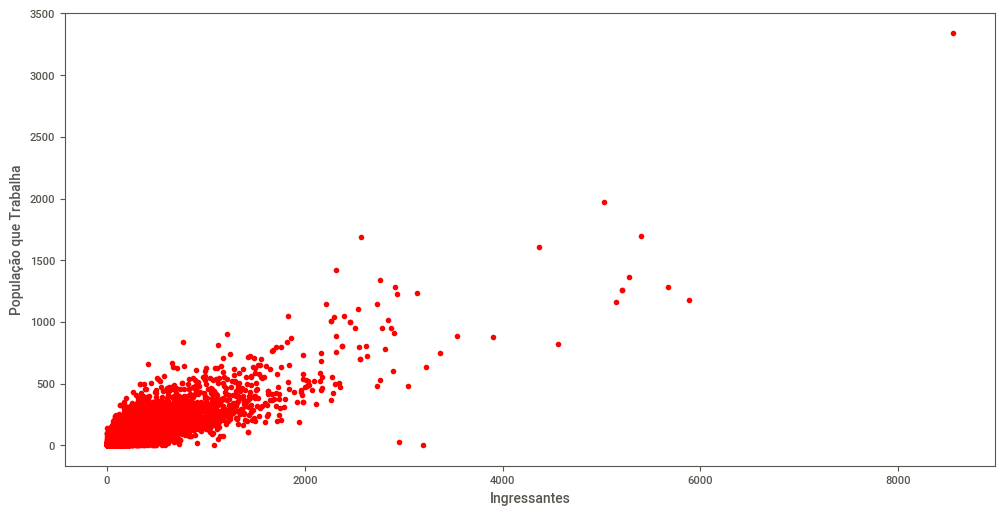

In [ ]:
plt.figure(figsize = (12,6))
plt.scatter(
    df_Faculdade_População['Matricula'], 
    df_Faculdade_População['Ingressantes'], 
    c='red')
plt.xlabel("Ingressantes")
plt.ylabel("População que Trabalha")
plt.show()

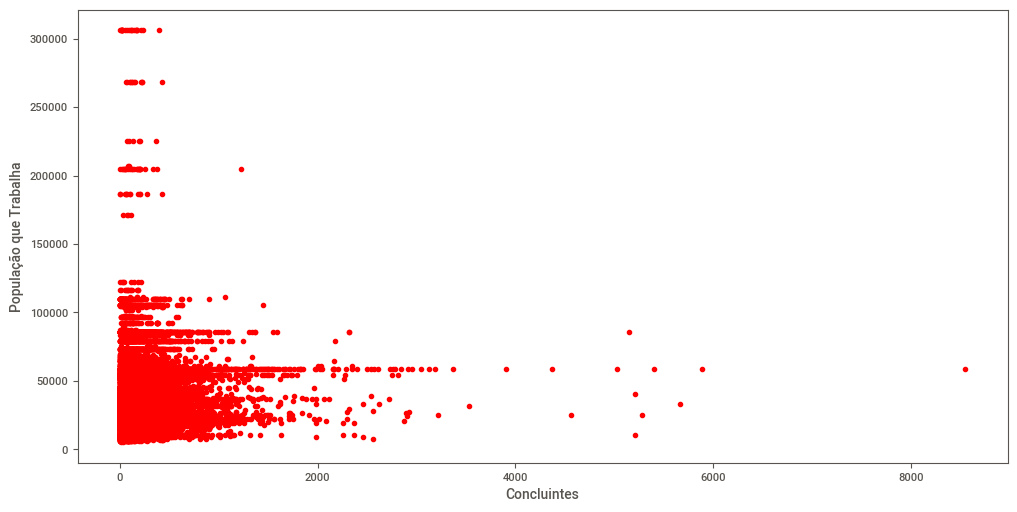

In [ ]:
plt.figure(figsize = (12,6))
plt.scatter(
    df_Faculdade_População['Matricula'], 
    df_Faculdade_População['PIB per Capita Total'], 
    c='red')
plt.xlabel("Concluintes")
plt.ylabel("População que Trabalha")
plt.show()

6.1 -> Observando os dois graficos, podemos concluir, a varíavel "Ingressantes no ensino superior é dependente da variável "população que trabalha". Quando consideramos a varíavel "concluintes", não temos uma relação direta, o que sugere uma relação entre renda e oportunidade de ingresso no ensino superior, corrobora com isso, o fato de termos mais universidades privadas do que públicas, onde as 4 universidades com maior numero de campus, são privadas e concentram mais de 5% do numero de campus, quando 92% das demais concentram menos de 1% da quantidade de campus e vagas.**

Um perfil recorrente na universidade superior é do aluno que paga pela própria formação, nesse cenário, a dependencia de um emprego/renda é essencial ao ingresso e permanencia desse aluno na universidade.**

Essas observações, sugerem que uma políticas governamentais efetivas de fomento a educação superior, deve estar conscientes da infraestrutura existente das instituições privada, além disso, a qualidade do ensino e aprendizado, para o aumento da produtividade da força de trabalho no mercado nacional, passa diretamente pelas universidades privadas, se considerarmos o numero de vagas e volume de alunos dessas instituições.**

Uma outra análise nesse sentido, de produtividade da força de trabalho x custo, poderia ser a avaliação do custo do governo federal versus o custo das instituições privadas e avaliar a produtividades dos egressos desses locais, na perspectiva de renda, e neste caso, poderíamos responder a pergunta: quanto custa o não investimento em educação superior, por parte da sociedade.

# 7 -> Regressão simples

Abaixo 2 paineis de regressão simples:

1 - Ingressantes no Ensino Superior x População que trabalha.

2 - Ingressantes no Ensino Superior x População que trabalha.

**Onde**:

H0=B1=0 (ou seja, não existe relação entre as variáveis)

Ha= não H0

P= 0,05



**7.1**

Y - Ingressantes no Ensino Superior - Universidades Privadas

X - População que trabalha

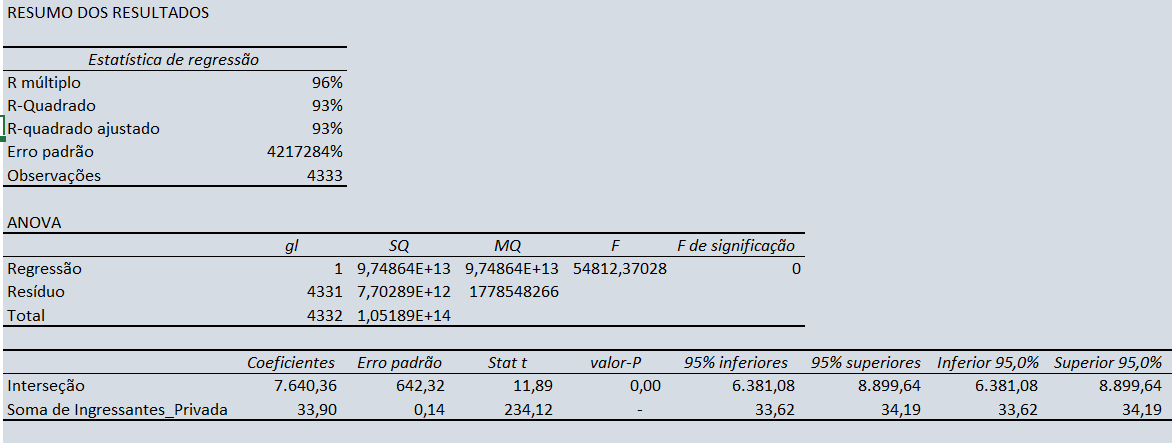

**7.2**

Y - Ingressantes no Ensino Superior - Universidades Públicas

X - População que trabalha

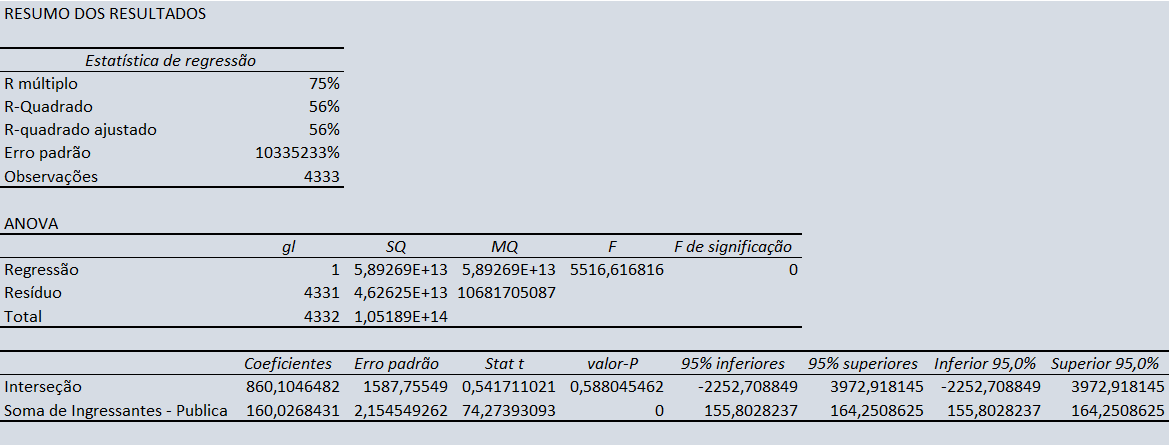

**7.3**

Conforme observado, o o valor da correlação entre o Y observado e o Y estimado é maior, quando observamos os dados dos ingressantes das universidades privadas, em relação aos ingressantes das universidades públicas.

O Coeficiente de Determinação denota uma maior correlação entre Ingressantes de universidades privadas versus população que trabalha, quando comparamos a mesma variável com os ingressantes de universidades publicas.

Pela análise da Soma de Quadrados, podemos afirmar que a váriável Y, pode ser explicada pela variável x, em ambas as comparações.

Porém, o F de significação (P-Valor), é igual a Zero, que é menor do que 0,05, logo, rejeita- se H0, o que indica que existe regressão, ou seja, variável X, explica a variável Y.



**7.4**

Considerei inverter as varíaveis, para entender se a população que trabalha, ou seja o nível de emprego, explica a varíavel Ingressantes nas universidades privadas, considerando a mesma hipótese da analise acima, no caso, teve-se o mesmo resultado, rejeitar H0, que indica que a existe regressão.

O Mercado de educação, veio em uma crescente nas ultimas decadas e o recuo atual desse mercado em 2020 / 2021, no que diz respeito a expansão de base de alunos, pode ser explicado pelo nível de emprego e renda da população, é o que sugere a partir da análise dos dados de 2019.

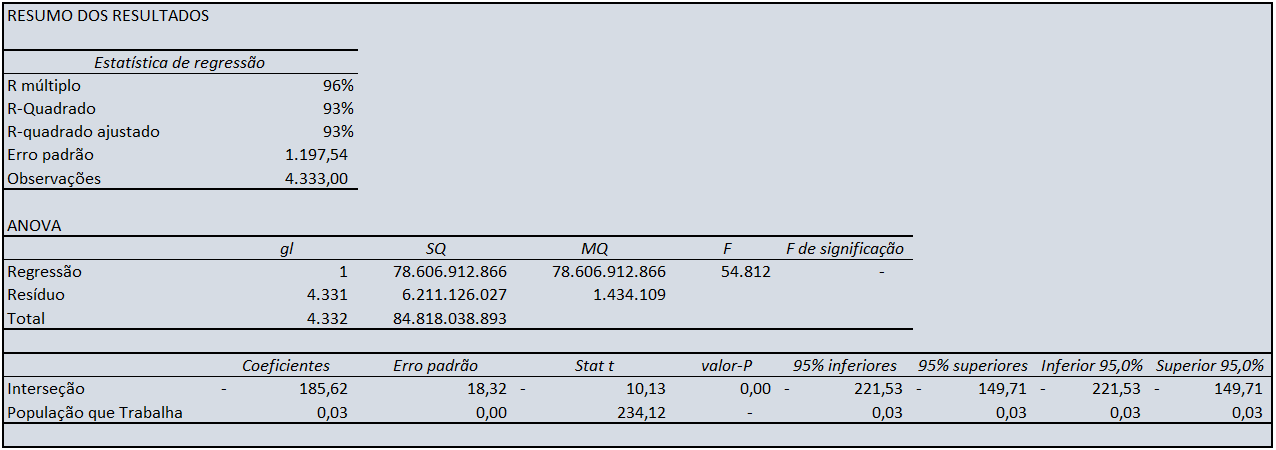

# 8 -> Regressão Multipla
Abaixo 3 paineis de regressão Multipla:

1 - Y = Matricula no Ensino Superior

2 - Y = Ingressantes no Ensino Superior

3 - Y = Concluintes no Ensino Superior

X - População que trabalha, IDH, TGCA Renda Média (%), PIB Per Capita.

**Onde**:

H0=B1=B2=0 (ou seja, não existe relação entre as variáveis)

Ha= não H0

P= 0,05


# 8.1

Y = Matricula no Ensino Superior

X - População que trabalha, IDH, TGCA Renda Média (%), PIB Per Capita.



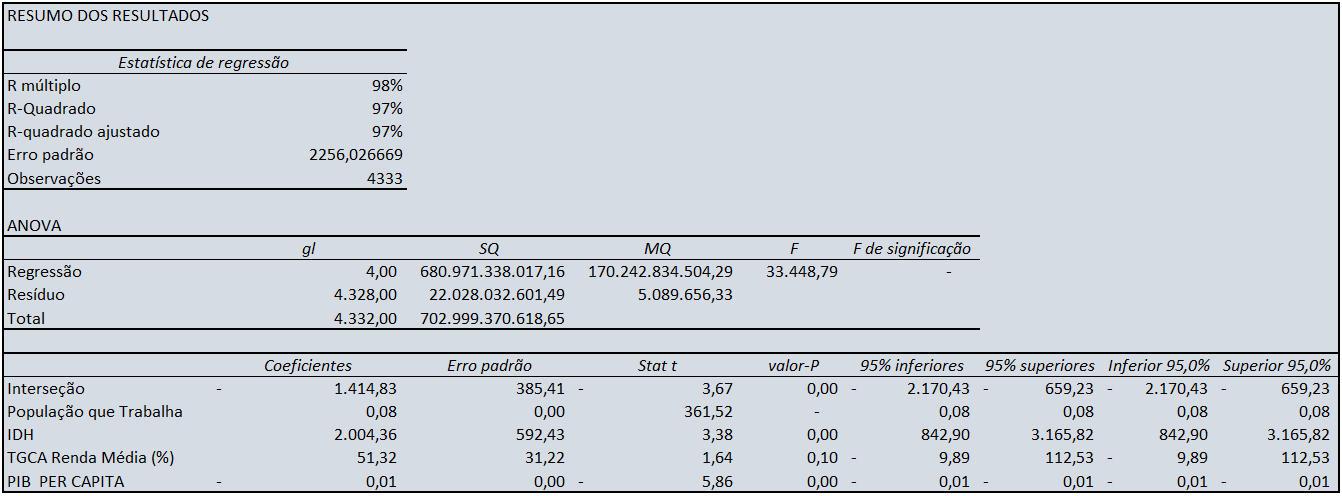

# 8.2

Y = Ingressantes no Ensino Superior

X - População que trabalha, IDH, TGCA Renda Média (%), PIB Per Capita.

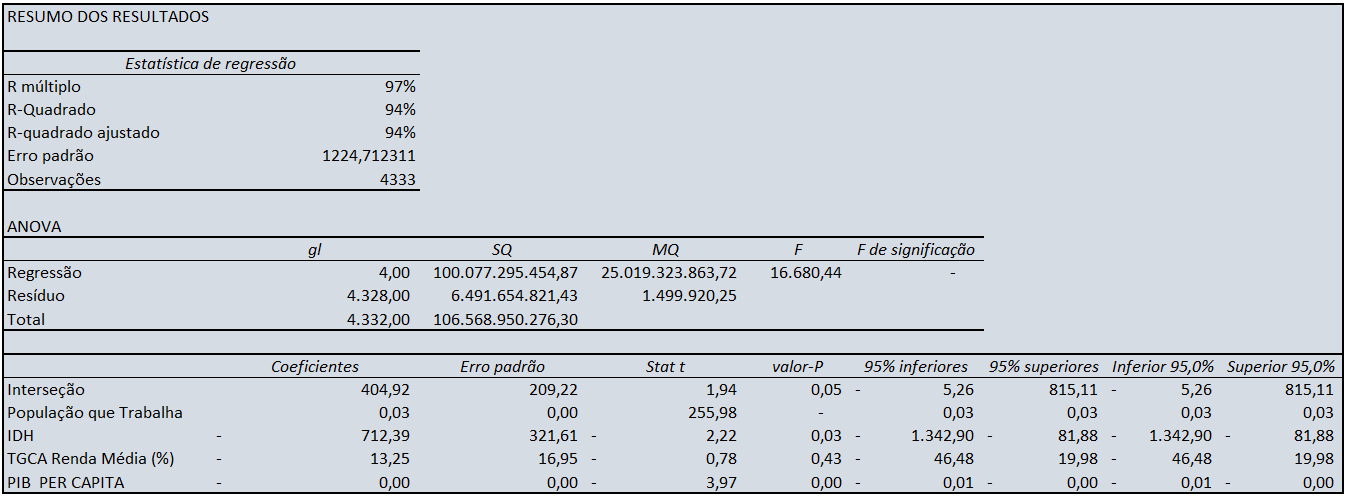 

# 8.3
Y = Concluintes no Ensino Superior

X - População que trabalha, IDH, TGCA Renda Média (%), PIB Per Capita.

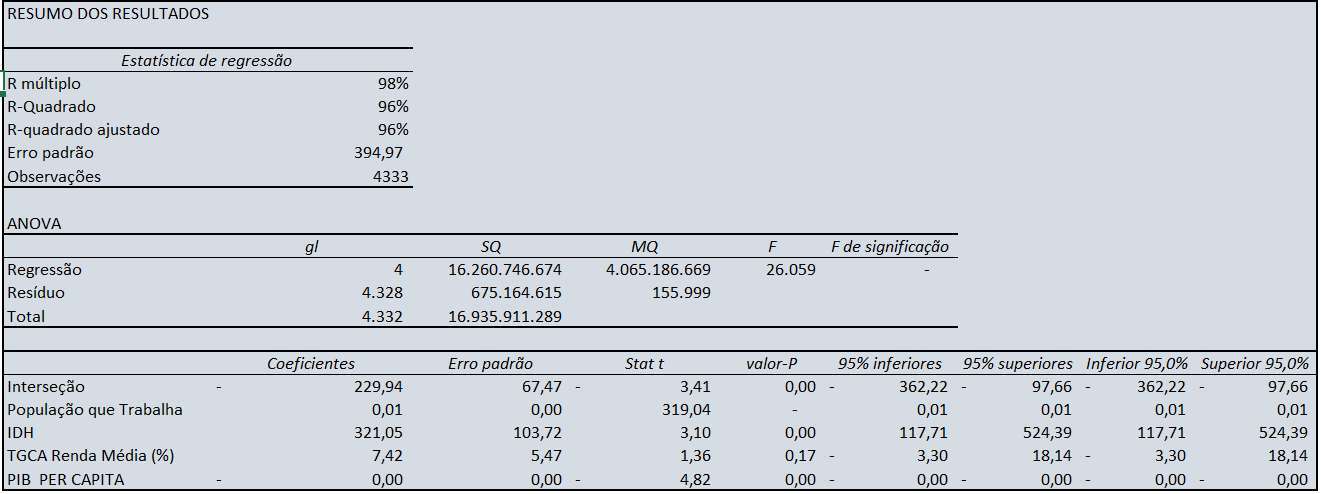

# 8.4

Nas 3 análises, podemos perceber que a correlação entre Y e o Y estimado fica próxima e indica uma forte correlação.

O Erro padrão é bem superior na análise dos dados de volume de matrícula, especialmente quando comparamos com o numero de amostras.

Na Soma de quadrados, é sempre esperado que o maior volume esteja na regressão e não na parte de resíduos, e isso se confirma nas 3 análises.

O Valor-P é menor do que 0,05 em todas as análises, o que indica que devemos rejeitar a hipótese H0. Porém, analisando as variáveis de forma individual percebe-se que a varíavel TGCA Renda Médica (%), que é o crescimento de renda da população, é maior do que 0,05, quando o Y é Ingressantes e Concluintes. Neste caso, essa varíavel não explica o Y, apesar do fato de que existir regressão simples.

# 8.5 - Teste T

Faremos o Teste T para analisar a varíavel Y = Matriculas, porém todas as equações já foram gerados e estão nos paineis.

No Y = Matrícula, temos:

considerando B*=0

No painel, os dados Start T indicam o resultado do Tcalc.
O teste, era entender de B1=0,B2=0, B3=0 e B4=0.

Como podemos perceber, todos os B são diferentes de zero,logo, rejeitamos H=0, ou seja todas as varíaveis,explicam o Y, existe regressão.


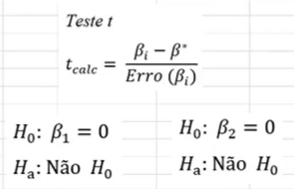

# Conclusão

Atraves dos testes e análises é possivel perceber uma relação clara entre o volume de pessoas que estão na universidades e as varíveis socios demográficas, isso aliado com outras análises pode indicar uma atuação direcionada do país em algumas dessas varíaveis quando o objetivo for o fomento da Educação Superior.

O programa Universidade para todos do Governo Federal, de acordo com a análise, foi assertivo quando foi capaz de elevar o volume de ingressantes na universidade e manter esses alunos na universidades, uma vez que trabalho e renda explicam a varíavel Matrícula e Ingressantes.

O resultado disso, é um aumento de renda, dado que existe uma correlação entre os concluintes e o aumento da renda.

A análise não foi capaz de fornecer informações sofre produtividade do trabalho, PIB e etc, uma vez que o objetivo era apenas observar a relação entre as variáveis escolhidas e verificar uma hipótese de que mais renda e emprego está diretamente ligada ao ingresso no ensino superior.






fim.